In [2]:
## mclust package:
## Ref: https://cran.r-project.org/web/packages/mclust/vignettes/mclust.html
## Ref: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5096736/

## Method used:
## "Model-based clustering based on parameterized finite Gaussian mixture models. 
##  Models are estimated by EM algorithm initialized by hierarchical model-based agglomerative clustering. 
##  The optimal model is then selected according to BIC."
## The BIC is better for higher value, which is different from the normal convention.

library(mclust)

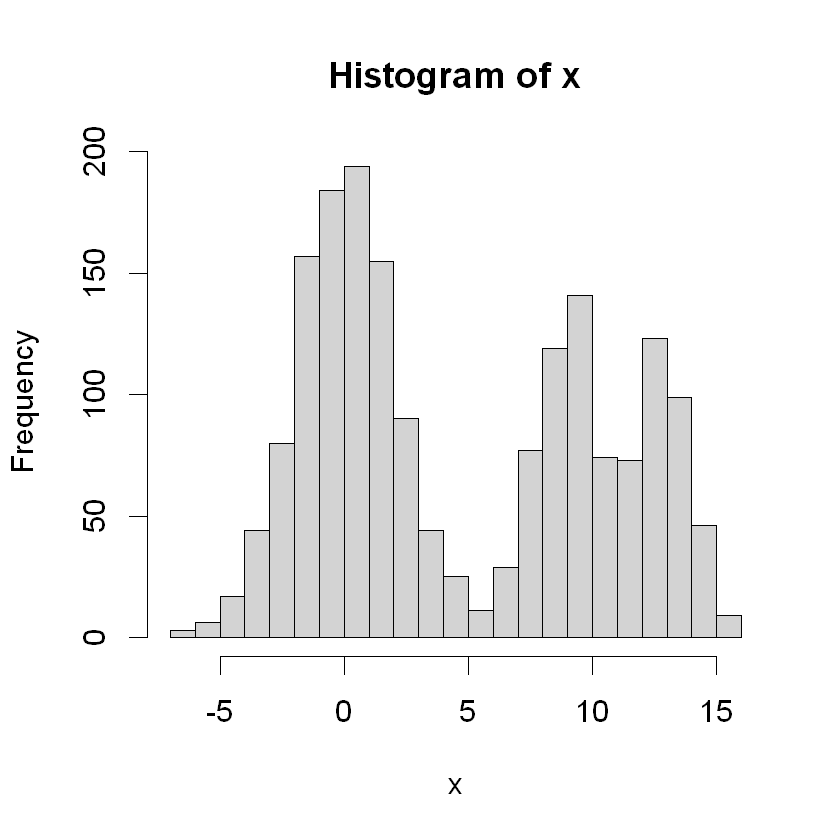

In [3]:
## Artificial 1D data:
par(cex=1.5)
set.seed(5)
x1 <- rnorm(1000, mean=0, sd=2.0)  
x2 <- rnorm(500, mean=9, sd=1.5)  
x3 <- rnorm(300, mean=13, sd=1.0)  
x <- c(x1, x2, x3)
hist(x, breaks=30)

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust V (univariate, unequal variance) model with 4 components: 

 log-likelihood    n df      BIC       ICL
      -5095.974 1800 11 -10274.4 -11130.36

Clustering table:
  1   2   3   4 
456 548 463 333 

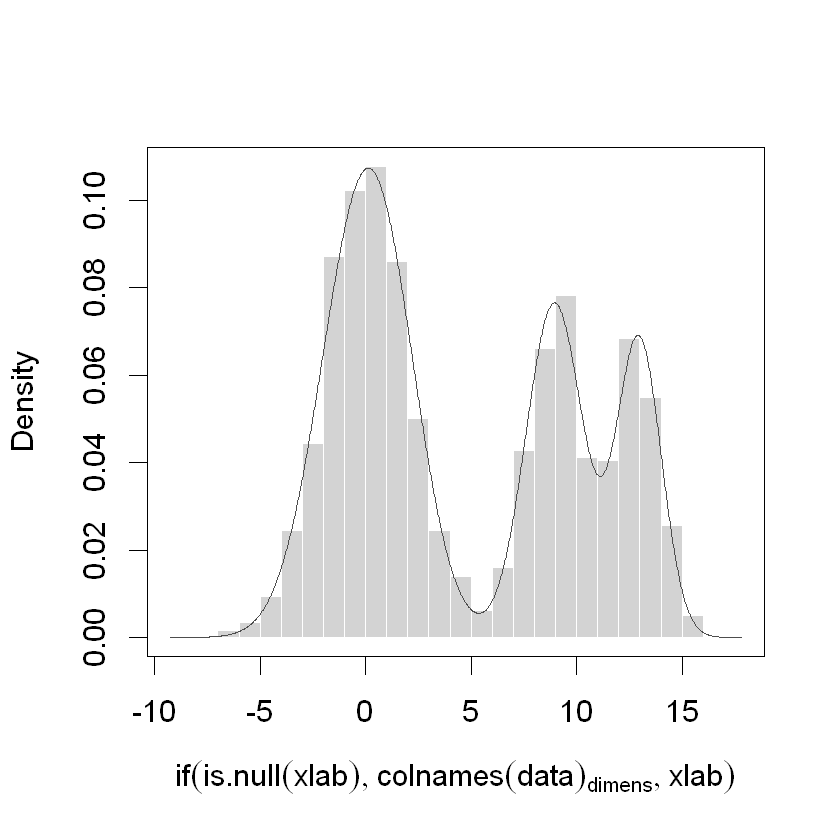

In [4]:
## Fitting to Artificial 1D data by Mlust:
par(cex=1.5)
mytest <- Mclust(x)
summary(mytest)
plot(mytest, what="density", data=x, breaks=30)

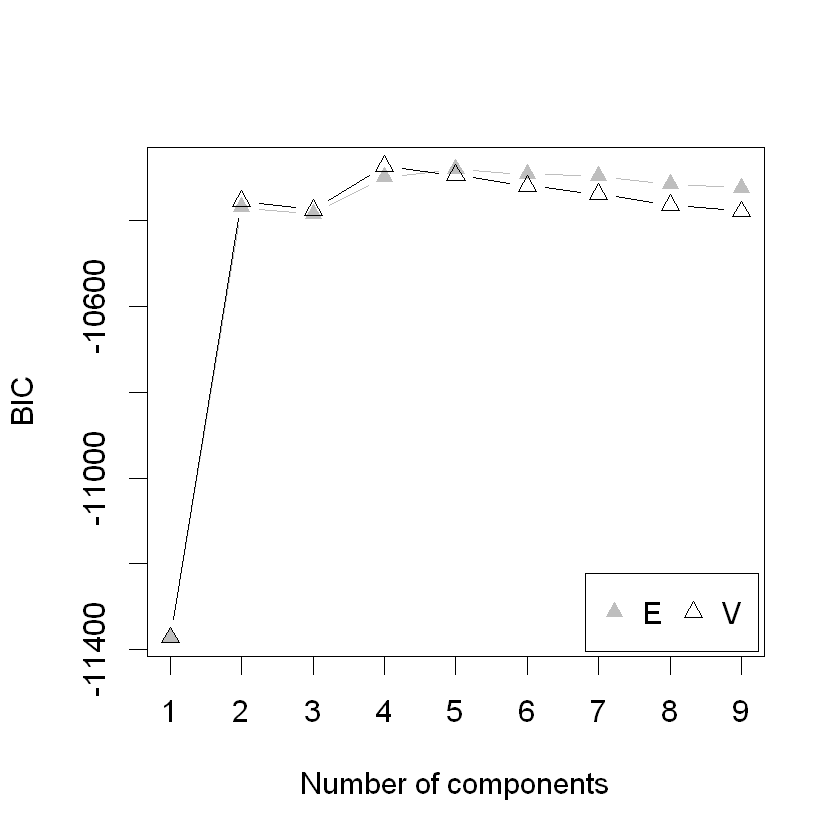

In [5]:
## BIC for different gaussian mixture models, 
## "E": equal-variance, "V": variable/unqual variance
par(cex=1.5)
plot(mytest, what="BIC")

In [6]:
## Extract results:
names(mytest)
# mytest$classification  ## to get the class membership
mytest$parameters  ## to access the estimated parameters

[1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "loglik"        
 [9] "df"             "bic"            "icl"            "hypvol"        
[13] "parameters"     "z"              "classification" "uncertainty"

$pro
[1] 0.2690288 0.2887290 0.2598589 0.1823833

$mean
         1          2          3          4 
-0.9220588  0.9644747  8.9519321 12.9544047 

$variance
$variance$modelName
[1] "V"

$variance$d
[1] 1

$variance$G
[1] 4

$variance$sigmasq
[1] 3.413252 3.169418 1.835637 1.140309

$variance$scale
[1] 3.413252 3.169418 1.835637 1.140309

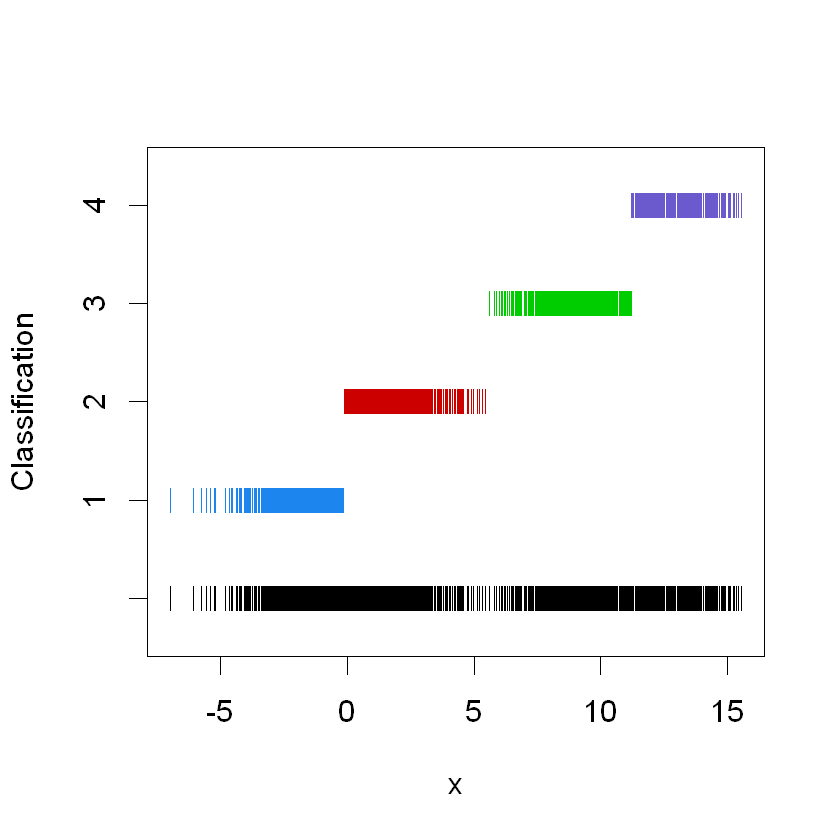

In [7]:
## Plot class membership found by mclust:
par(cex=1.5)
plot(mytest, what="classification")

In [8]:
## Make prediction on a new point:
predict(mytest, 11.2)
predict(mytest, 11.3)

$classification
[1] 3

$z
                1           2         3        4
[1,] 7.041248e-10 1.16146e-07 0.5222369 0.477763

$classification
[1] 4

$z
                1            2         3         4
[1,] 4.853611e-10 8.267136e-08 0.4537193 0.5462806

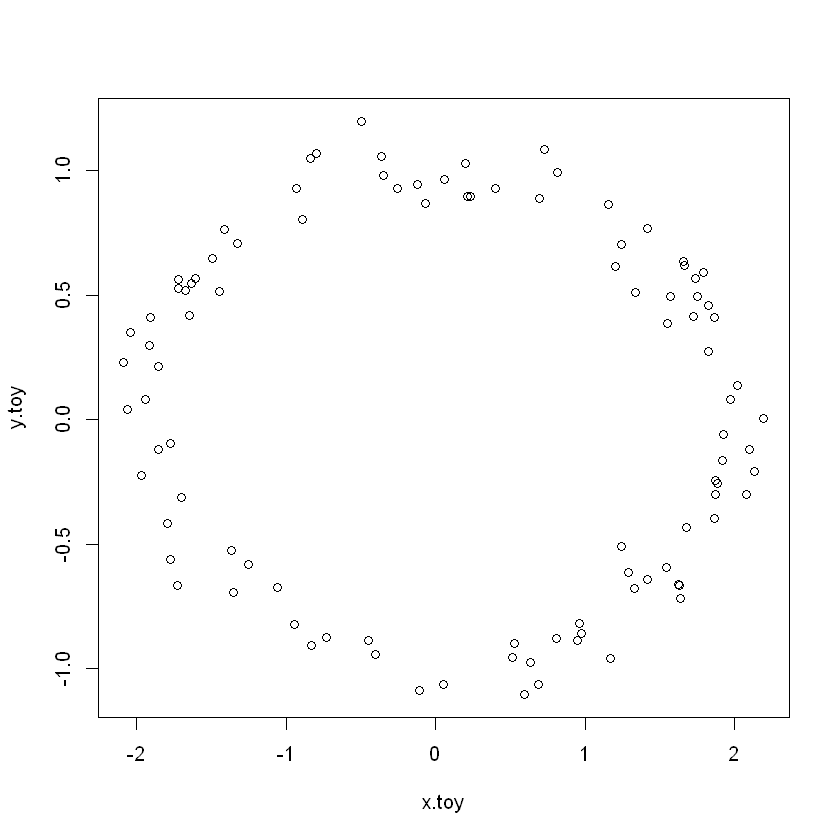

In [9]:
## Artificial 2D data on a ring:
set.seed(2)
theta <- 2*pi*runif(100)
x.toy <- 2*sin(theta) + rnorm(100)*0.1
y.toy <- cos(theta) + rnorm(100)*0.1

data.toy <- cbind(x.toy, y.toy)
plot(data.toy)

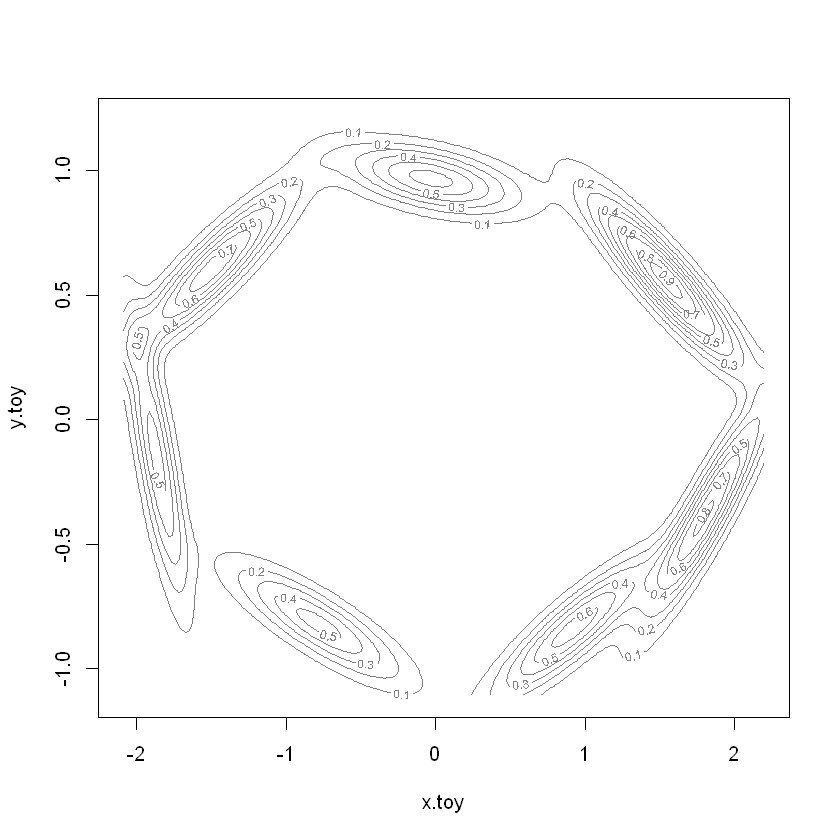

In [10]:
## Fitting to Artificial 2D data and visualization:
mytest.toy <- Mclust(data.toy)
# summary(mytest.toy)
plot(mytest.toy, what="density")

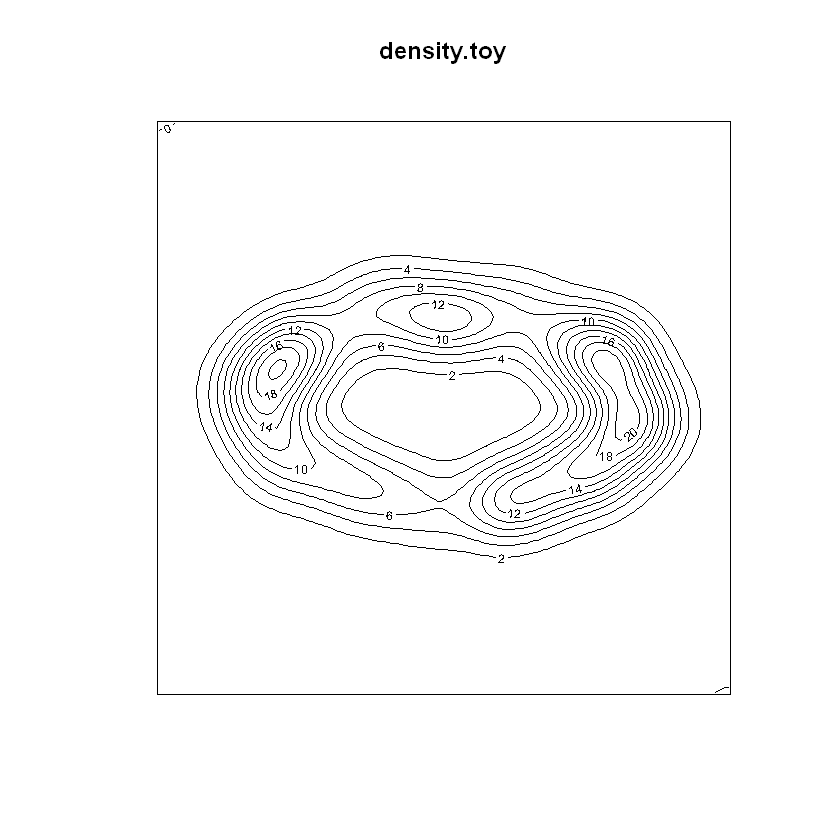

In [12]:
## Non-parametric:
library(spatstat)
window <- owin(c(-3, 3), c(-3, 3))
ppp.toy <- ppp(x=x.toy, y=y.toy, window)
density.toy <- density(ppp.toy, adjust=0.4)
contour(density.toy)

In [13]:
## diabete dataset in mclust ----
## The data set contains three measurements made on 145 non-obese adult patients classified into three groups.
# class:    The type of diabete: Normal, Overt, and Chemical.
# glucose:  Area under plasma glucose curve after a three hour oral glucose tolerance test (OGTT).
# insulin:  Area under plasma insulin curve after a three hour oral glucose tolerance test (OGTT).
# sspg:     Steady state plasma glucose.
data(diabetes)
head(diabetes)

class  glucose insulin sspg
1 Normal  80     356     124 
2 Normal  97     289     117 
3 Normal 105     319     143 
4 Normal  90     356     199 
5 Normal  90     323     240 
6 Normal  86     381     157

In [14]:
summary(diabetes)

      class       glucose       insulin            sspg      
 Chemical:36   Min.   : 70   Min.   :  45.0   Min.   : 10.0  
 Normal  :76   1st Qu.: 90   1st Qu.: 352.0   1st Qu.:118.0  
 Overt   :33   Median : 97   Median : 403.0   Median :156.0  
               Mean   :122   Mean   : 540.8   Mean   :186.1  
               3rd Qu.:112   3rd Qu.: 558.0   3rd Qu.:221.0  
               Max.   :353   Max.   :1568.0   Max.   :748.0  

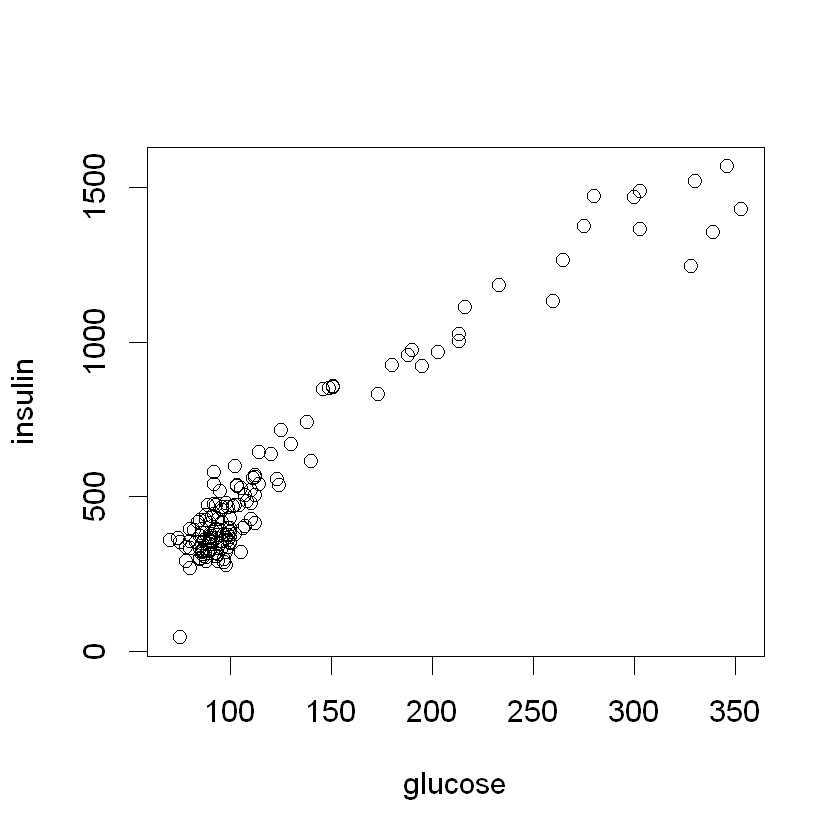

In [15]:
## Consider 2 features: glucose and insulin
par(cex=1.5)
diabetes.2D <- diabetes[, 2:3]     ## 2D data
plot(diabetes.2D)

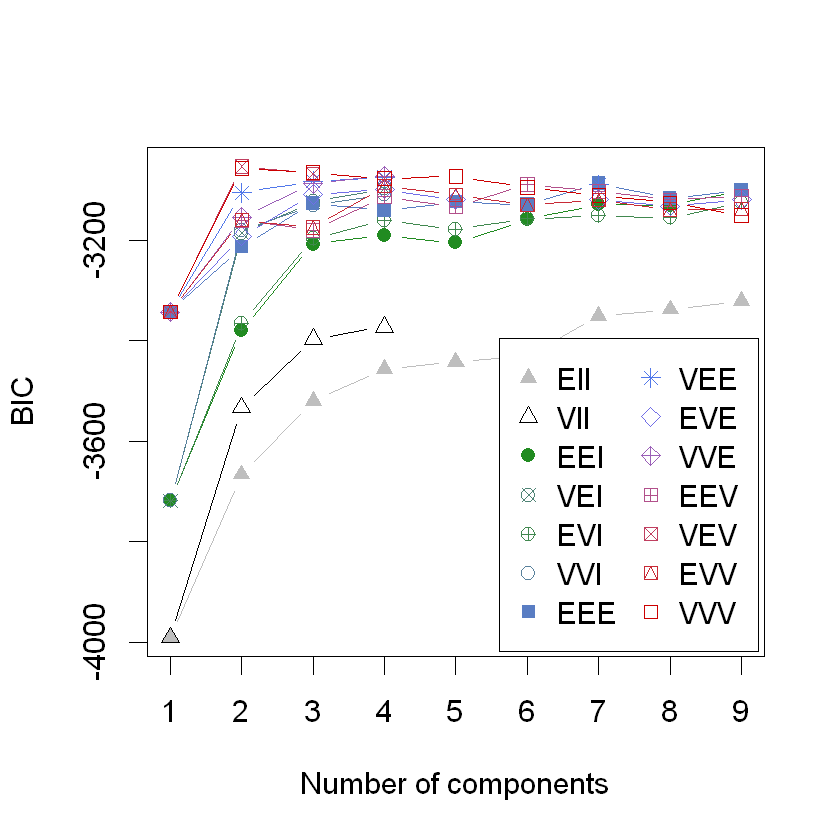

In [16]:
## Fitting to the 2-featured diabete data:
par(cex=1.5)
mytest.diabetes.2D <- Mclust(diabetes.2D)
plot(mytest.diabetes.2D, what="BIC")

'Mclust' model object: (VEV,2) 

Available components: 
 [1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "loglik"        
 [9] "df"             "bic"            "icl"            "hypvol"        
[13] "parameters"     "z"              "classification" "uncertainty"   

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust VEV (ellipsoidal, equal shape) model with 2 components: 

 log-likelihood   n df       BIC       ICL
      -1501.459 145 10 -3052.686 -3057.009

Clustering table:
  1   2 
115  30 

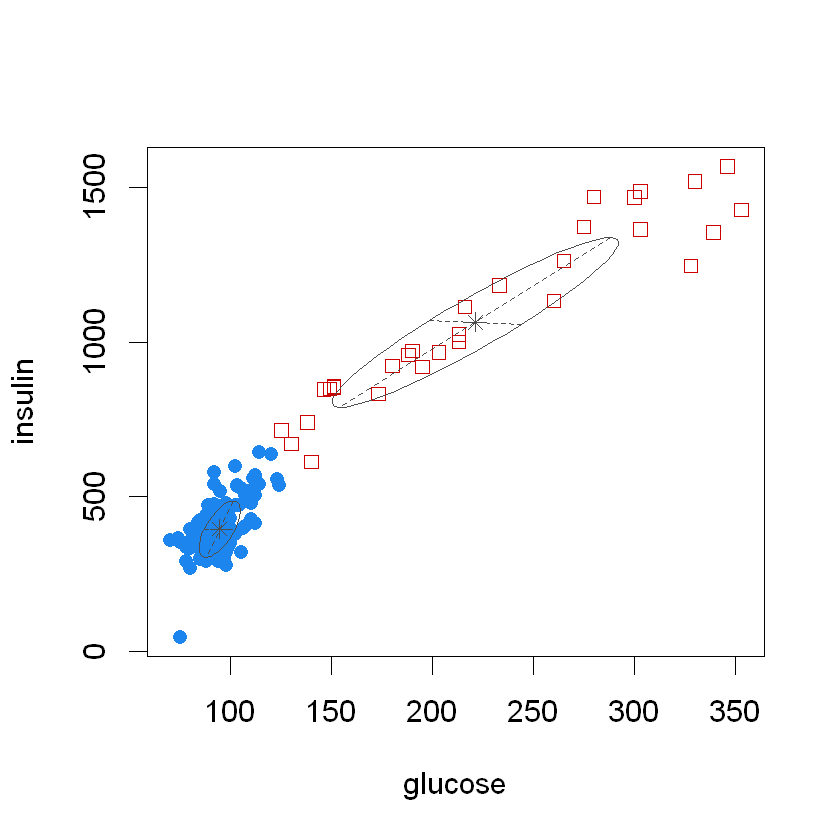

In [17]:
## Result of the fitting and visualization:
par(cex=1.5)
mytest.diabetes.2D
summary(mytest.diabetes.2D)
plot(mytest.diabetes.2D, what="classification")

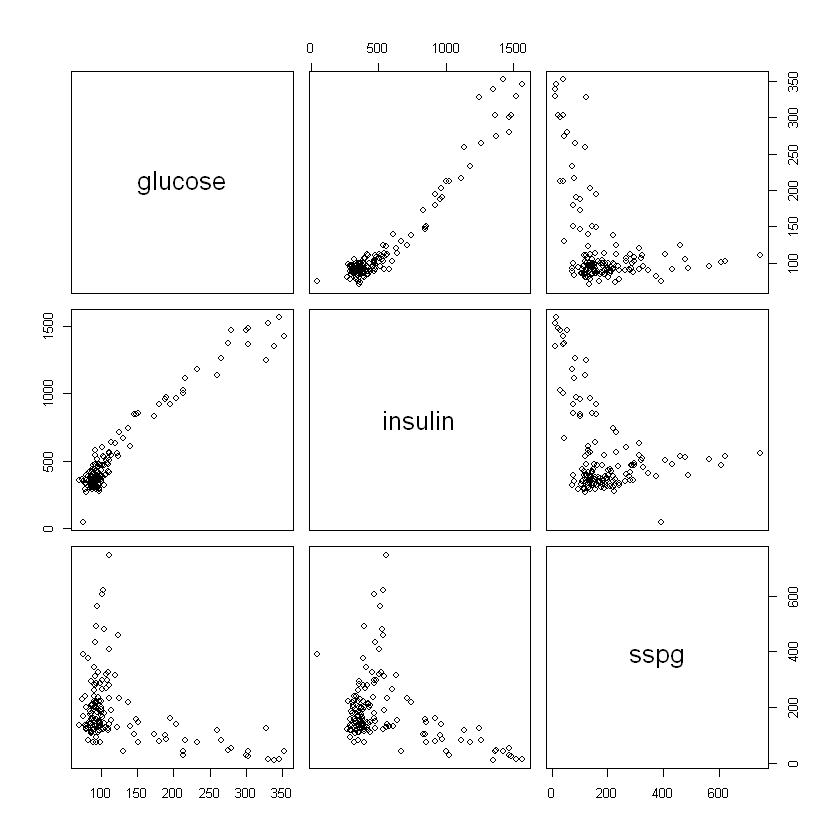

In [18]:
## Consider all 3 features: glucose, insulin and sspg:
par(cex=1.5)
diabetes.3D <- diabetes[,2:4]     ## 3D data
pairs(diabetes.3D)

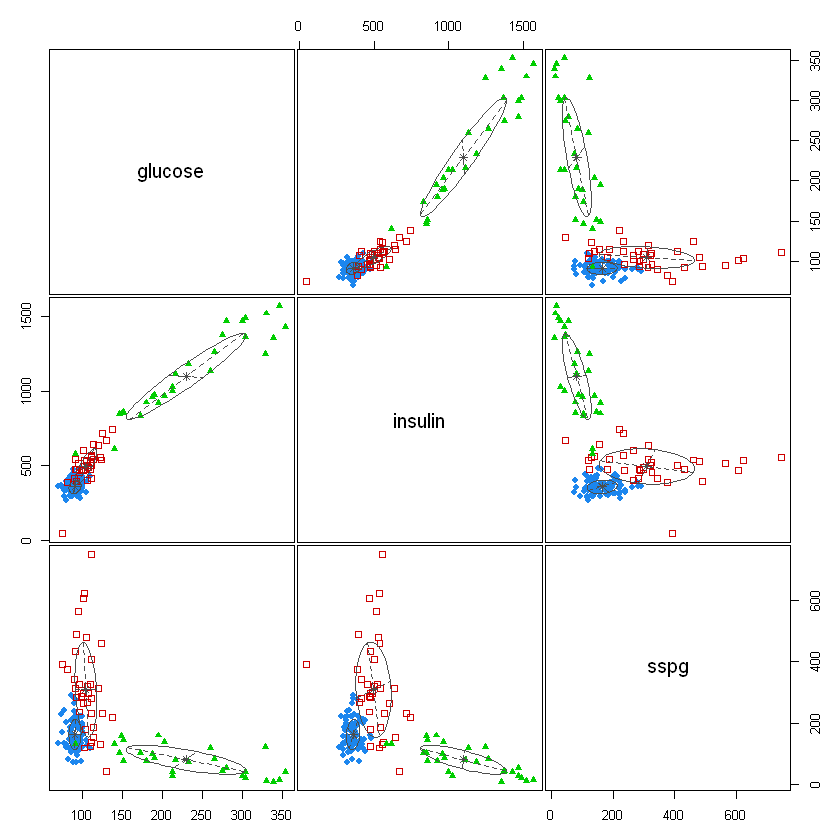

In [19]:
## Fitting to the 3-featured diabete data, and visulization:
mytest.diabetes.3D <- Mclust(diabetes.3D)
# summary(mytest.diabetes.3D)
plot(mytest.diabetes.3D, what="classification")

In [20]:
## Propotion of different class:
round( prop.table( table(diabetes[ ,1]) ), digit=3 )  ## data
round( mytest.diabetes.3D$parameters$pro, digit=3 )   ## GMM


Chemical   Normal    Overt 
   0.248    0.524    0.228 

[1] 0.537 0.265 0.198

In [21]:
## To compute "classification accurary".
## Note that we can not know the true labels from Gaussian mixture (as they are hidden/latent),
## we need some extra knowledge to identify which class is "Normal", which class is "Chemical", etc.

## Here we manually identify the correct order of classes, 
## by noticing "Normal" has the largest propotion, 
## and "Chemical" has the second largest propotion.
lvs <- c("Normal", "Chemical", "Overt")  
diabetes.class.by.GMM <- lvs[ mytest.diabetes.3D$classification ]

length(diabetes[ ,1])  ## no. of instance
sum( diabetes.class.by.GMM == diabetes[ ,1])   ## no. of correctly classified
mean( diabetes.class.by.GMM == diabetes[ ,1])  ## accurary

[1] 145

[1] 125

[1] 0.862069